## The following is an implementation of the 'Modern Portfolio Theory', which facilitates the search for the most optimal portfolio for a given amount of risk. Furthermore, Utility theory has been incorporated to find the investor specific optimal portfolio.

In [151]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
from datetime import datetime,timedelta

df=data.DataReader('SBIN.NS', 'yahoo', start = '2019/01/01', end = '2020/01/01')
#df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-01,300.700012,293.850006,297.500000,299.600006,11837127.0,299.600006
2019-01-02,302.500000,293.100006,299.100006,293.899994,25559853.0,293.899994
2019-01-03,295.549988,290.100006,295.000000,291.100006,17548347.0,291.100006
2019-01-04,299.000000,291.500000,292.100006,297.649994,19514041.0,297.649994
2019-01-07,301.500000,295.200012,301.049988,296.299988,14579399.0,296.299988
...,...,...,...,...,...,...
2019-12-26,333.450012,328.100006,333.000000,329.850006,24616942.0,329.850006
2019-12-27,338.350006,333.000000,333.399994,337.250000,33477173.0,337.250000
2019-12-30,337.850006,332.500000,337.750000,334.399994,22775554.0,334.399994


Preview of the data acquired.

Insert the company tickers you're interested in below.

In [175]:
symbols=['RELIANCE','TCS','INFY','HDFCBANK']

In [176]:
def get_data(ticker):
    start = datetime.now()-timedelta(days=730)
    Today = datetime.now().strftime("%Y/%m/%d")
    df=data.DataReader(ticker + '.NS', 'yahoo', start = start.strftime("%Y/%m/%d"), end = Today)
    df=df.loc[:]['Close']
    return df
#get_data('SBIN')

def data_matrix(tickers):
    data=pd.DataFrame()
    for i in range(len(tickers)):
        data[tickers[i]]=get_data(tickers[i])
        i+=1
    return data
#data_matrix(symbols)


,RELIANCE,TCS,INFY,HDFCBANK
Date,,,,
2018-07-31,1186.000000,1940.199951,682.549988,1089.750000
2018-08-01,1192.349976,1976.500000,677.025024,1079.349976
2018-08-02,1168.349976,1948.400024,676.825012,1065.099976
2018-08-03,1176.949951,1979.449951,682.049988,1060.819946
2018-08-06,1192.599976,1975.550049,680.325012,1057.150024
...,...,...,...,...
2020-07-23,2057.800049,2171.199951,907.950012,1130.400024
2020-07-24,2146.149902,2157.399902,922.849976,1119.099976
2020-07-27,2156.199951,2206.800049,948.450012,1079.500000


In [177]:
def var(tickers):  #Daily Variance
    df=data_matrix(tickers)
    df=df.pct_change().apply(lambda x: np.log(1+x))
    return df.var()
#var(symbols)

def std(tickers):
    s=np.sqrt(var(tickers)) #Daily Standard Deviation
    s_a=s*np.sqrt(243) #Annualised STD, assumed an average of 243 trading days in a year
    #print(s_a)
    return s_a
#std(symbols)

RELIANCE    0.377723
TCS         0.295294
INFY        0.347758
HDFCBANK    0.306454
dtype: float64

In [178]:
def cov_matrix(tickers):  #Covariance Matrix
    df=data_matrix(tickers).pct_change().apply(lambda x: np.log(1+x))
    return df.cov()
#cov_matrix(symbols)

,RELIANCE,TCS,INFY,HDFCBANK
RELIANCE,0.000587,0.000190,0.000184,0.000236
TCS,0.000190,0.000359,0.000253,0.000120
INFY,0.000184,0.000253,0.000498,0.000157
HDFCBANK,0.000236,0.000120,0.000157,0.000386


In [179]:
def corr_matrix(tickers):  #Correlation Matrix
    df=data_matrix(tickers).pct_change().apply(lambda x: np.log(1+x))
    return df.corr()
#corr_matrix(symbols)

,RELIANCE,TCS,INFY,HDFCBANK
RELIANCE,1.000000,0.413423,0.340706,0.495601
TCS,0.413423,1.000000,0.599270,0.322785
INFY,0.340706,0.599270,1.000000,0.358413
HDFCBANK,0.495601,0.322785,0.358413,1.000000


In [180]:
def exp_ret(tickers):  #Expected Returns, calculated using historical returns. 
    prices=data_matrix(tickers)
    e_r= prices.resample('Q').last().pct_change().mean()
    return e_r
#exp_ret(symbols)    

RELIANCE    0.090163
TCS         0.010922
INFY        0.042957
HDFCBANK    0.019768
dtype: float64

In [181]:
def assets(tickers):  #Your Asset list, and their volatility (Annual)
    ast=pd.DataFrame()
    ast['Exp Returns']=exp_ret(tickers)
    ast['Volatility']=std(tickers)
    return ast
assets(symbols)

,Exp Returns,Volatility
RELIANCE,0.090163,0.377723
TCS,0.010922,0.295294
INFY,0.042957,0.347758
HDFCBANK,0.019768,0.306454


# Formulating Efficient Frontier


# $$Sharpe Ratio = \frac{E(R_i)-rf}{\sigma_i}$$
The Efficient Frontier contains all the portfolio combinations that provide maximum returns at a given risk/volatility. Hence a wise investor must only consider the portfolios present on the edge of the graph, as the rest combinations offer more risk at a given return value.
The most optimal portfolio, where you get the most bang for your buck (maximum returns per unit of risk undertaken) is given be the portfolio with maximum Sharpe Ratio.

In [186]:
def FEF(tickers):
    p_ret=[]
    p_vol=[]
    p_weights=[]
    e_r=exp_ret(tickers)
    cov_mat=cov_matrix(tickers)

    num_assets=len(tickers)
    num_ports=10000
    
    for port in range(num_ports):
        weights=np.random.random(len(tickers))
        weights=weights/np.sum(weights)
        p_weights.append(weights)
        returns= np.dot(e_r,weights)
        p_ret.append(returns)
        variance = cov_mat.mul(weights,axis=0).mul(weights,axis=1).sum().sum()
        std_annual=np.sqrt(variance)*np.sqrt(243)
        p_vol.append(std_annual)
    
    Data = {'Returns':p_ret, 'Volatility':p_vol}
    for counter,symbol in enumerate(tickers):
        Data[symbol + ' weight'] = [w[counter] for w in p_weights]
    
    portfolios = pd.DataFrame(Data)
    
    plt.subplots(figsize=(20,10))
    plt.scatter(portfolios['Volatility'], portfolios['Returns'])
    
    #CALCULATING MINIMUM RISK/VOLATILITY PORTFOLIO
    
    min_var_p = portfolios.iloc[portfolios['Volatility'].idxmin()]
    print("The minimum risk portfolio details: \n")
    print(min_var_p) #series object
    plt.scatter(min_var_p[1], min_var_p[0], color='y')
    print("\n")
    
    #CALCULATING OPTIMAL RISKY PORTFOLIO, THROUGH MAXIMISING SHARPE RATIO
    
    rfr=0.058    #Current risk free rate in india
    SR = (portfolios['Returns'] - rfr)/portfolios['Volatility']
    opti_port = portfolios.iloc[SR.idxmax()]
    print("The optimal risky portfolio details: \n")
    print(opti_port) #series object
    plt.scatter(opti_port[1], opti_port[0], color='g')
    
    plt.show()
    return portfolios, min_var_p, opti_port

# Utility Function and Capital Allocation Line
 Utility function formula : $$U = E(R)-0.5A\sigma^2$$
 Capital Allocation line formula : $$E(R_P) = rf + \frac{E(R_i)-rf}{\sigma_i}\sigma_p$$
 
Utility is a measure of relative satisfaction that an investor derives from different portfolios. In determining the risk aversion (A), we measure the marginal reward an investor needs in order to take on more risk. A risk-averse investor will need a high margin reward for taking on more risk.
 A>0 for risk-averse investors;
 A=0 for risk-neutral investors;
 A<0 for risk-loving investors;

The Capital Allocation Line (CAL) is a line that graphically depicts the risk-and-reward profile of assets, and can be used to find the optimal portfolio. The optimal risky asset portfolio is at the point where the CAL is tangent to the efficient frontier.


The minimum risk portfolio details: 

Returns            0.022918
Volatility         0.240977
RELIANCE weight    0.062664
TCS weight         0.427568
INFY weight        0.108714
HDFCBANK weight    0.401053
Name: 2336, dtype: float64


The optimal risky portfolio details: 

Returns            0.082306
Volatility         0.343596
RELIANCE weight    0.856395
TCS weight         0.012699
INFY weight        0.101944
HDFCBANK weight    0.028962
Name: 191, dtype: float64


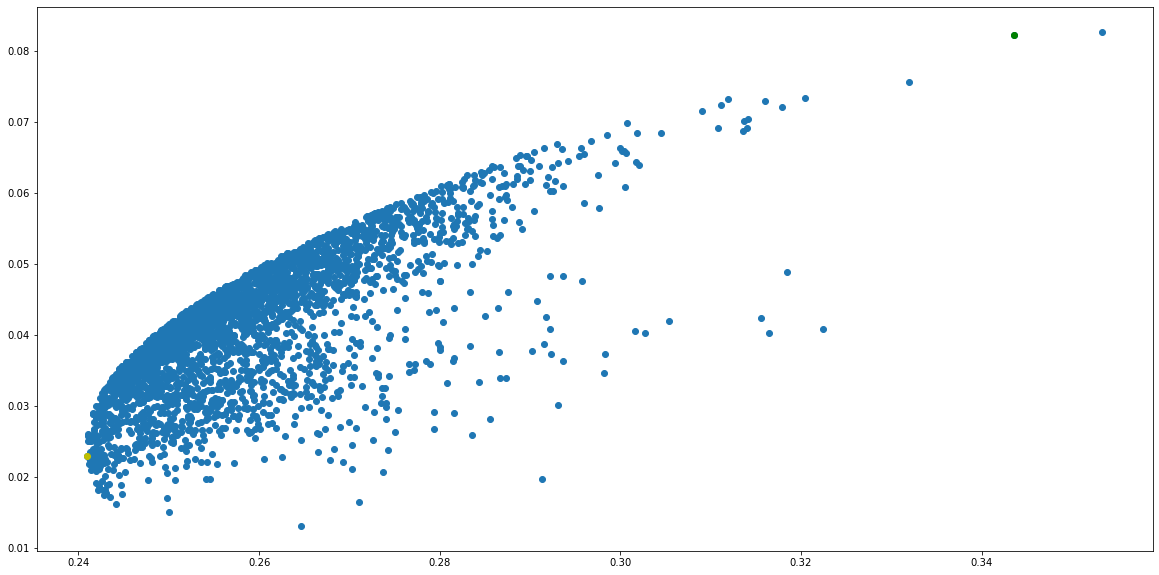

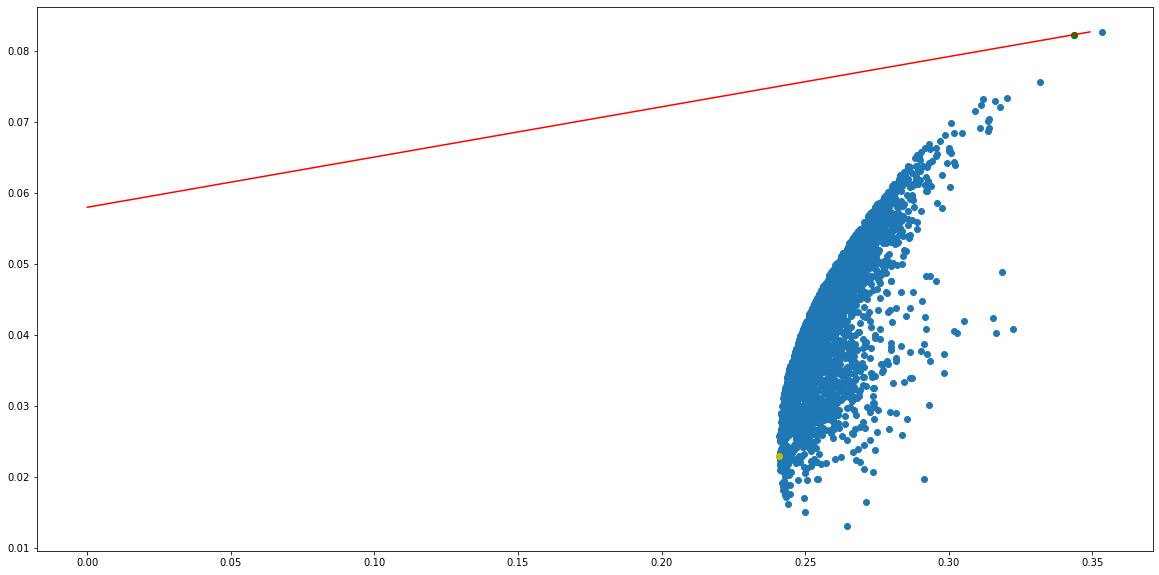

In [195]:
def CAL(tickers):
    cal_x=[]
    cal_y=[]
    util=[]
    a=2 #Assumed
    rfr=0.058    #Current risk free rate in india
    
    portfolios, min_var_p, opti_port = FEF(tickers)
    
    for er in np.linspace(rfr, portfolios['Returns'].max(), 20):
        sd = (er - rfr)/((opti_port[0]-rfr)/opti_port[1])
        u = er - .5*a*(sd**2)
        cal_x.append(sd)
        cal_y.append(er)
        util.append(u)
    
    
    data2 = {'utility':util, 'cal_y':cal_y, 'cal_x':cal_x}
    cal = pd.DataFrame(data2)
    
    plt.subplots(figsize=(20,10))
    plt.scatter(portfolios['Volatility'], portfolios['Returns'])
    plt.scatter(min_var_p[1], min_var_p[0], color='y')
    plt.scatter(opti_port[1], opti_port[0], color='g')
    plt.plot(cal_x, cal_y, color='r')
    plt.show()
    
CAL(symbols)

The Red line denotes the Capital Allocation Line, which is tangent to the Efficient Frontier at the most optimal portfolio.
The Yellow Dot represents the Minimum Volatility/Risk Portfolio. 
The Green Dot represents the Optimal Risky Portfolio. 
Multiply the weights of your preferred portfolio with your principle amount, to get the amount of money you should invest in these stocks individually.